In [26]:
import matplotlib.pyplot as plt
import pandas as pd

This data was acquired running the program in a supercomputer starting from the
center of Strasbourg and making the area grow bigger

In [27]:
data = pd.read_csv("metrics.csv")

Since we're going to use the area as our main feature (because it's the one we 
control when we mesh an area) we want to see how the area (in $m^2$) is related to the number of trees available.  
Note that this highly depend on the configuration of the environment, in city trees aren't usually evenly distributed (avenues, parks, etc.) so we can't expect a linear relationship between the area and the number of trees all the times.

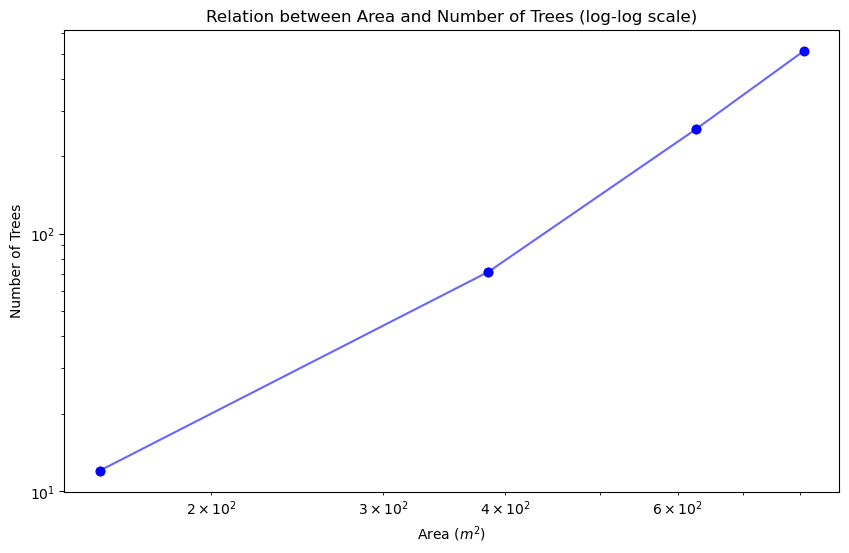

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(data['area'], data['ntree'], color='blue', alpha=0.6, marker='o')
plt.title('Relation between Area and Number of Trees (log-log scale)')
plt.xlabel('Area ($m^2$)')
plt.ylabel(f'Number of Trees')
plt.xscale('log')
plt.yscale('log')
plt.show()

Here since the plot is a line in the log-log scale we can expect the relationship between the number of trees and the area in meter squared to be a power law.

The LOD (Level of Detail) we chose also have a big impact.  
We didn't necessary chose it in a linear fashion, so we want to see how the different LODs are related to the number of faces produced in the meshes.

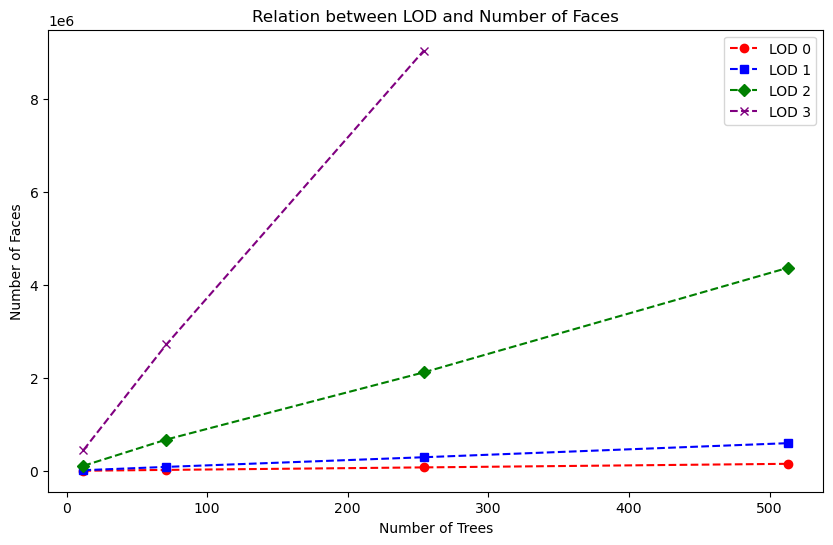

In [14]:
plt.figure(figsize=(10, 6))

# Define colors and markers for different LODs
colors = ['red', 'blue', 'green', 'purple']
markers = ['o', 's', 'D', 'x']
lods = [0, 1, 2, 3]

for i, lod in enumerate(lods):
    lod_data = data[data['lod'] == lod]
    plt.plot(lod_data['ntree'], lod_data['nfaces'], marker=markers[i], 
             color=colors[i], linestyle='--', label=f'LOD {lod}')

plt.title('Relation between LOD and Number of Faces')
plt.xlabel('Number of Trees')
plt.ylabel('Number of Faces')
plt.legend()
plt.show()

The relation between the number of faces and the LOD is linear.  
You can see better here how we chose our LODs with the last one being the far more detailed.

Finally, we want to benchmark the time it takes to mesh the area per LOD.

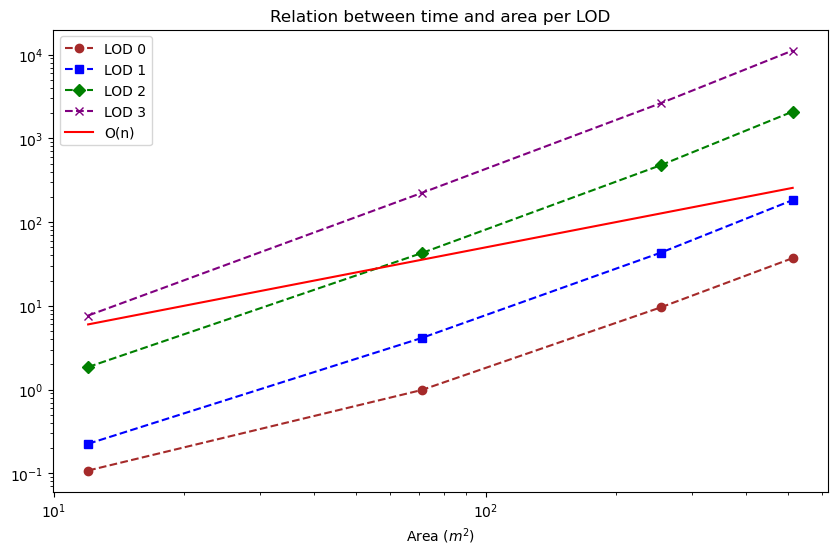

In [28]:
plt.figure(figsize=(10, 6))

# Define colors and markers for different LODs
colors = ['brown', 'blue', 'green', 'purple']
markers = ['o', 's', 'D', 'x']
lods = [0, 1, 2, 3]

for i, lod in enumerate(lods):
    lod_data = data[data['lod'] == lod]
    plt.plot(lod_data['ntree'], lod_data['time'], 
             marker=markers[i], color=colors[i], linestyle='--', label=f'LOD {lod}')
    
x = data['ntree']
y = 0.5*x

plt.plot(x, y, color='red', linestyle='-', label='O(n)')


plt.title('Relation between time and area per LOD')
plt.xlabel(f'Number of Trees')
# plt.ylabel('Time (s)')
plt.legend()
plt.show()

Again this relation seems to follow a power law, to be more precise we would need more data.